# Financial planning for Trang's first home

## Problems: 
I am planning to buy my first home. The idea is to get a 60-squared meter appartment (let's call it starter apartment) so that my husband and I and my future child can live comfortably in the next 5 years. After that, we will move to a bigger apartment with 2 rooms. After 5 years, I will put "starter" apartment  for rent.

So I face with these issues to figure out:

**1. What kind of mortgage is the best for my situation?** 
        
At the moment, I need to choose among 2 options:

(i) Floating non-negative euribor 6 months (If euribor6m is negative, I will pay 0% + bank margin, i.e. 0% +  bank margin (0.45%) = 0.45% right now)

(ii) floating non-negative euribor 12 months ((If euribor12m is negative, I will pay 0% + bank margin, i.e. 0% + bank margin (0.45%) = 0.45% right now)


To break it down, I need to choose which euribor to user (6m or 12m) and do I want to use interest collar or not

**2. Where is a good location for my apartment (investment wise)?**

## Question 1:  What kind of mortgage is the best for my situation?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import requests

%matplotlib inline


In [2]:
url = 'https://pkgstore.datahub.io/core/euribor/euribor-6m-monthly_csv/data/d3238e1b2e479d0b7985f1c2d45e0117/euribor-6m-monthly_csv.csv'
response = requests.get(url)
with open('euribor-6m-monthly_csv.csv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
url = 'https://pkgstore.datahub.io/core/euribor/euribor-12m-monthly/archive/981caa09d42bf64e7c638bf6785cea07/euribor-12m-monthly.csv'
response = requests.get(url)
with open('euribor-12m-monthly_csv.csv', mode = 'wb') as file:
    file.write(response.content)

In [2]:
euribor_6m = pd.read_csv('euribor-6m-monthly_csv.csv')
euribor_6m.head()

,date,rate,maturity_level,granularity
0,1999-01-01,3.233,6m,monthly
1,1999-02-01,3.017,6m,monthly
2,1999-03-01,3.059,6m,monthly
3,1999-04-01,2.920,6m,monthly
4,1999-05-03,2.604,6m,monthly


In [3]:
euribor_12m = pd.read_csv('euribor-12m-monthly_csv.csv')
euribor_12m.head()

,date,rate,maturity_level,granularity
0,1999-01-01,3.213,12m,monthly
1,1999-02-01,2.998,12m,monthly
2,1999-03-01,3.079,12m,monthly
3,1999-04-01,2.939,12m,monthly
4,1999-05-03,2.680,12m,monthly


In [4]:
## merge euribo6m with euribor12m
euribor = euribor_12m.append(euribor_6m)
euribor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 219
Data columns (total 4 columns):
date              440 non-null object
rate              440 non-null float64
maturity_level    440 non-null object
granularity       440 non-null object
dtypes: float64(1), object(3)
memory usage: 17.2+ KB


In [6]:
euribor['date'] = pd.to_datetime(euribor['date'])

Text(0.5, 0, 'rate')

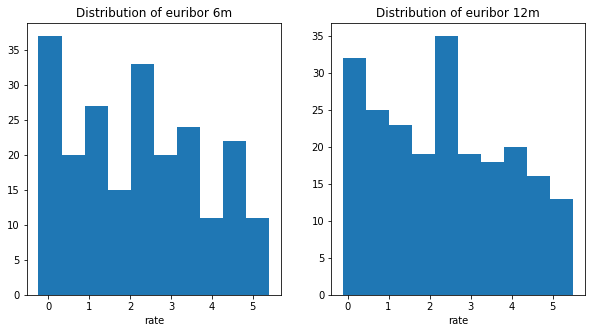

In [13]:
## look at euribor 6m & 12 m
fig = plt.figure(figsize = [10,5])
plt.subplot(1,2,1)
plt.hist(data = euribor[euribor.maturity_level == '6m'], x = 'rate', bins = 10)
plt.title('Distribution of euribor 6m')
plt.xlabel('rate')
plt.subplot(1,2,2)
plt.hist(data = euribor[euribor.maturity_level == '12m'], x = 'rate', bins = 10)
plt.title('Distribution of euribor 12m')
plt.xlabel('rate')

There is no abnormal data in euribor 6m. 

In [ ]:
## look at euribor 12m
plt.hist(data)

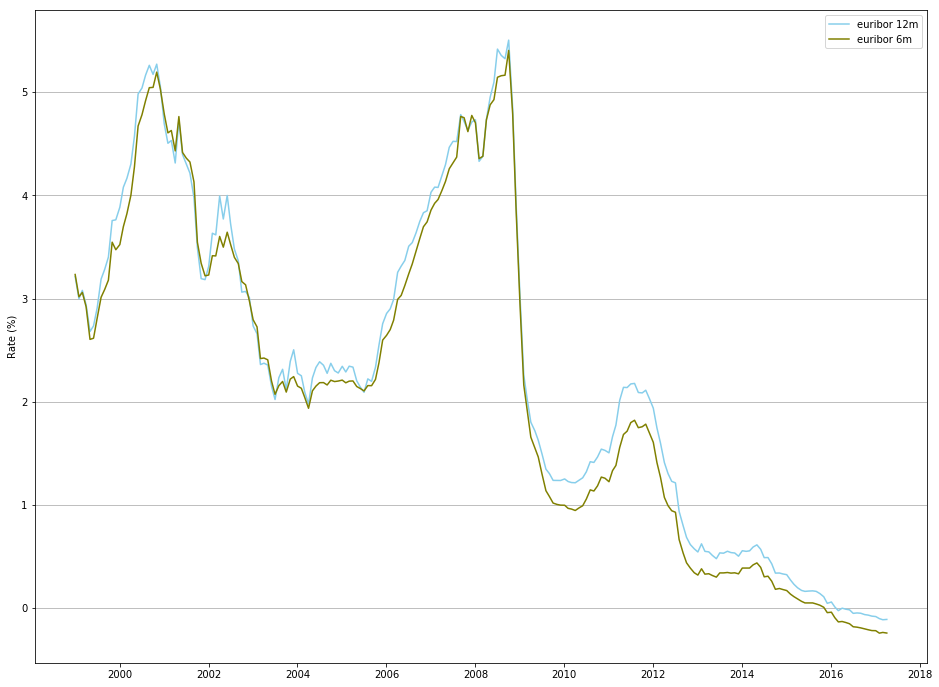

In [9]:
plt.figure(figsize = [16,12])
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '12m'], color='skyblue')
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '6m'], color='olive')
plt.ylabel('Rate (%)')
plt.legend(['euribor 12m', 'euribor 6m'])
plt.grid(b = bool, axis = 'y')

Insights from the charts:
- Euribor 12m is always higher than euribor 6m (The difference is around 0.1 - 0.5%). When the interest rate trend is upwards, the difference of 12m and 6m is larger --> **Euribor 6 is more preferable**

- In the last 2 decades, the highest value of euribor is aroune 5%. With floating interest rate, the loan interest can get very high when euribor increases. However, with the higest value of euribor around 5%, I can cope with the worst scenario when interest sky-rocks.

Now I will have a closer look on euribor from the previous economic cycle - from 2010 - 2018. The interest rate before financial crisis 2009 is higher than normal situation so I think it is more realistic to ignore that time. In addition, I will import economic growth of EU countries to see if there is any correlation between growth rate and interest rate

In [25]:
##the file is download mannually from https://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&plugin=1&language=en&pcode=tec00115
growth_rate = pd.read_csv('Euro_growth_rate.csv')
growth_rate.head()

,geo\time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,EU (28 countries),3.1,0.5,-4.3,2.1,1.7,-0.4,0.3,1.8,2.3,2,2.5,2
1,Euro area (changing composition),3,0.4,-4.4,2.1,1.6,-0.9,-0.3,1.4,2.1,1.9,2.4,1.9
2,Euro area (19 countries),3.1,0.5,-4.5,2.1,1.6,-0.9,-0.2,1.4,2.1,1.9,2.4,1.9
3,Belgium,3.4,0.8,-2.3,2.7,1.8,0.2,0.2,1.3,1.7,1.5,1.7,1.4
4,Bulgaria,7.3,6,-3.6,1.3,1.9,0,0.5,1.8,3.5,3.9,3.8,3.1


In [26]:
## Restructure the data with 3 columns: geo/time, date and growth rate
growth_rate = pd.melt(growth_rate, id_vars=['geo\\time'], var_name = "date", value_name = 'growth_rate')
growth_rate['date'] = pd.to_datetime(growth_rate['date'])

growth_rate.head()

,geo\time,date,growth_rate
0,EU (28 countries),2007-01-01,3.1
1,Euro area (changing composition),2007-01-01,3
2,Euro area (19 countries),2007-01-01,3.1
3,Belgium,2007-01-01,3.4
4,Bulgaria,2007-01-01,7.3


In [27]:
growth_rate.growth_rate.unique()

array(['3.1', '3', '3.4', '7.3', '5.6', '0.9', '7.7', '5.3', '3.3', '3.8',
       '2.4', '1.5', '5.1', '10', '11.1', '8.4', '0.4', '4', '3.7', '7',
       '2.5', '7.2', '6.9', '10.8', '5.2', '9.4', ':', '4.1', '6.5', '6',
       '6.4', '5', '0.5', '0.8', '2.7', '-0.5', '1', '-5.4', '-4.5',
       '-0.3', '1.1', '0.3', '2', '-1.1', '3.6', '-3.5', '2.6', '-1.3',
       '2.2', '4.2', '0.2', '9.3', '0.7', '-0.6', '5.5', '7.5', '5.7',
       '5.4', '-4.3', '-4.4', '-2.3', '-3.6', '-4.8', '-4.9', '-5.7',
       '-14.7', '-5.1', '-2.9', '-7.3', '-5.5', '-2', '-14.4', '-14.8',
       '-6.6', '-2.5', '-3.7', '-3.8', '2.8', '-3', '-7.8', '-8.3',
       '-5.2', '-4.2', '-6.8', '-1.7', '-2.2', '-5.8', '-0.4', '-2.7',
       '-4.7', '-3.1', '2.1', '1.3', '2.3', '1.9', '1.8', '0', '-1.5',
       '1.7', '-3.9', '1.6', '4.9', '3.5', '1.2', '-3.4', '8.5', '3.9',
       '7.6', '-9.1', '-1', '0.6', '2.9', '-1.8', '3.2', '4.4', '-0.9',
       '-0.8', '4.3', '-2.8', '-1.6', '-4', '-1.4', '1.4', '-0.7', '4.

There is one value of ":" --> Need to clean it

In [28]:
growth_rate[growth_rate.growth_rate == ":"]

,geo\time,date,growth_rate
32,Liechtenstein,2007-01-01,:
35,Montenegro,2007-01-01,:
40,Bosnia and Herzegovina,2007-01-01,:
41,Kosovo (under United Nations Security Council ...,2007-01-01,:
74,Liechtenstein,2008-01-01,:
83,Kosovo (under United Nations Security Council ...,2008-01-01,:
116,Liechtenstein,2009-01-01,:
158,Liechtenstein,2010-01-01,:
200,Liechtenstein,2011-01-01,:
242,Liechtenstein,2012-01-01,:


It seems like it is a dirty data. I will remove these obs and convert growth_rate column to float

In [29]:
growth_rate = growth_rate[growth_rate.growth_rate != ":"]
## change type
growth_rate['growth_rate'] = growth_rate['growth_rate'].astype(np.float64)
growth_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 502
Data columns (total 3 columns):
geo\time       485 non-null object
date           485 non-null datetime64[ns]
growth_rate    485 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.2+ KB


Text(0.5, 0, 'time')

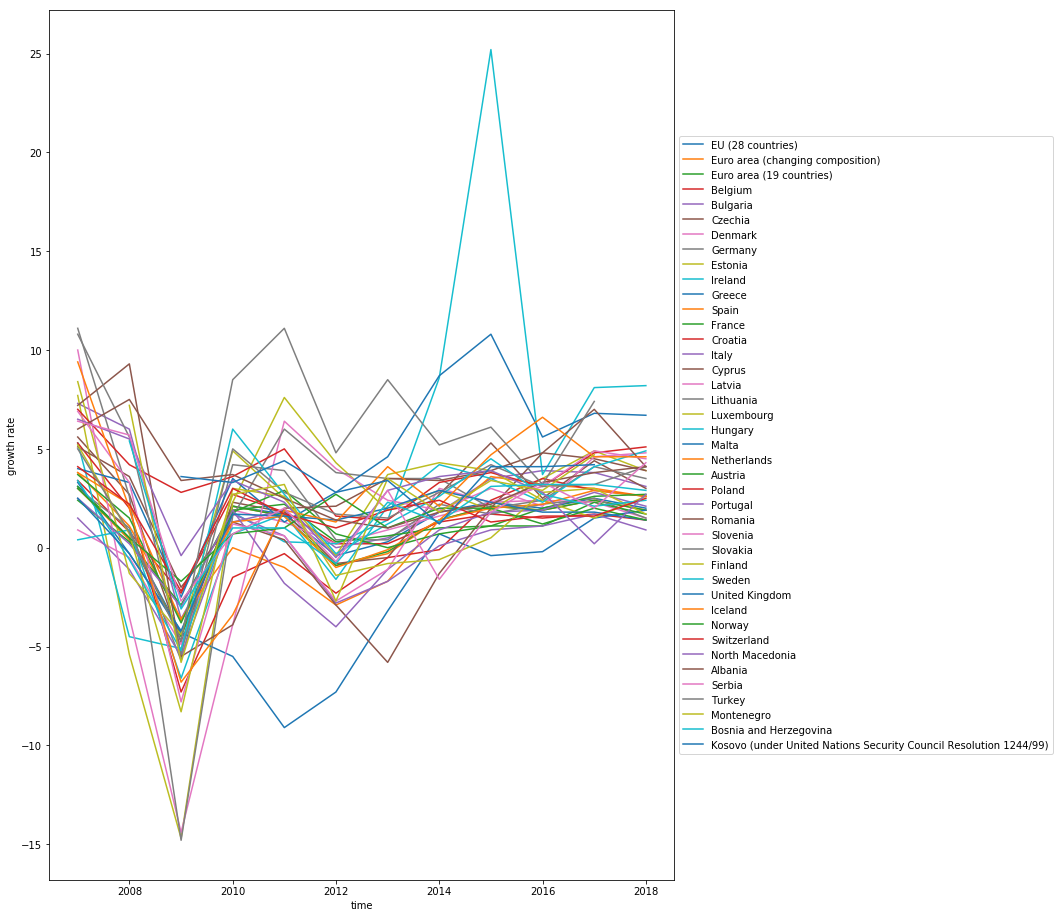

In [35]:
geo = growth_rate['geo\\time'].unique()
fig = plt.figure(figsize = [16,16])
ax = plt.subplot(111)
for country in geo:
    ax.plot('date', 'growth_rate', data = growth_rate[growth_rate['geo\\time'] == country])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
ax.legend(geo, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('growth rate')
plt.xlabel('time')

The financial crisis can be seen clearly in this chart. In the EU area, the majority of the countries follow the growth rate of the group. There are a few divergence appears.

For simplicity, I just take the growth rate of 19 countries which have the biggest economic impact in the Euro area 

In [36]:
##filter euro_area(19 countries)
growth_rate = growth_rate[growth_rate['geo\\time'] == "Euro area (19 countries)"]
growth_rate.head()

,geo\time,date,growth_rate
2,Euro area (19 countries),2007-01-01,3.1
44,Euro area (19 countries),2008-01-01,0.5
86,Euro area (19 countries),2009-01-01,-4.5
128,Euro area (19 countries),2010-01-01,2.1
170,Euro area (19 countries),2011-01-01,1.6


(733408.0, 736695.0)

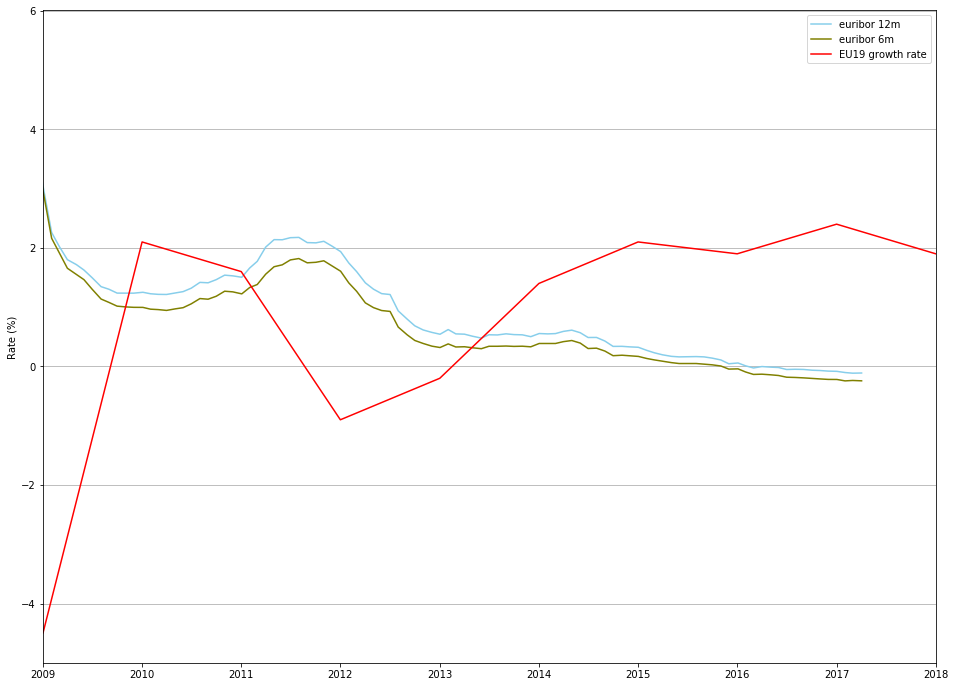

In [37]:
## Ploting euribor, growth rate together
plt.figure(figsize = [16,12])
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '12m'], color='skyblue')
plt.plot('date', 'rate', data = euribor[euribor.maturity_level == '6m'], color='olive')
plt.plot('date', 'growth_rate', data = growth_rate, color='red')
plt.ylabel('Rate (%)')
plt.legend(['euribor 12m', 'euribor 6m', 'EU19 growth rate'])
plt.grid(b = bool, axis = 'y')
plt.xlim(['1-1-2009', '1-1-2018'])

#### There are two insights from this charts:
- When euribo is upwards, it is not a sudden change. It takes approximately 1.5 years for the euribor 6m goes from 1% - 1.7% --> I still have a lot of buffer time to prepare for interest increase 
- When the economic is in downturn, the interest rate doesn't go up --> It is good since when the economy is in recession, it is more difficult to find a job/ maintain a job. If the interest rate goes up during this time, it will be very difficult for me
- When comparing the interest rate trend vs growth rate, the charts show that the interest rate upwards trend in 2011 - 2012 goes together with growth rate with a lag of 1 year. However, after 2013 the interest rate doesn't go together with growth rate anymore -->  It is a macro matter and it doesn't go hand in hand with growth rate --> Need to be careful to interpret the correlation between euribor and growth

#### Summary on question 1:
- Euribor 6m is preferable.
- It is quite safe option for me to get the loan based on the historical data of interest rate. I will have a lot of time buffer in case the interest rate increases. 

#### There are two insights from this charts:
- When euribo is upwards, it is not a sudden change. It takes approximately 1.5 years for the euribor 6m goes from 1% - 1.7% --> I still have a lot of buffer time to prepare for interest increase 
- When the economic is in downturn, the interest rate doesn't go up --> It is good since when the economy is in recession, it is more difficult to find a job/ maintain a job. If the interest rate goes up during this time, it will be very difficult for me
- When comparing the interest rate trend vs growth rate, the charts show that the interest rate upwards trend in 2011 - 2012 goes together with growth rate with a lag of 1 year. However, after 2013 the interest rate doesn't go together with growth rate anymore -->  It is a macro matter and it doesn't go hand in hand with growth rate --> Need to be careful to interpret the correlation between euribor and growth

#### Summary on question 1:
- Euribor 6m is preferable.
- It is quite safe option for me to get the loan based on the historical data of interest rate. I will have a lot of time buffer in case the interest rate increases. 

## 2. Where is a good location for my apartment (investment wise)?

In [44]:
## import housing price per postals 
##The data was download from "https://hri.fi/data/en_GB/dataset/helsinki-asuminen"
price = pd.read_csv('housing_price_for_old_dwelling.csv')
price.head()

,postal,name,2010,2013,2014,2015,2016,2017
0,10,Helsingin keskusta,5184.0,5981.0,6083.0,6110.0,5766,6724
1,12,Punavuori,5558.0,6273.0,6009.0,6424.0,6534,7068
2,13,Kaartinkaupunki,5388.0,6680.0,6937.0,6368.0,7553,7393
3,14,Kaivopuisto,5832.0,6661.0,6700.0,6746.0,7129,7469
4,15,Eira,5338.0,6340.0,6562.0,6542.0,6707,7227


In [41]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
postal    76 non-null int64
name      76 non-null object
2010      73 non-null float64
2013      75 non-null float64
2014      75 non-null float64
2015      75 non-null float64
2016      76 non-null int64
2017      76 non-null int64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.8+ KB


In [47]:
## Duplicate "2010" column to get the data as the base line to calculate % increase >> Reshape the data
price['base_line'] = price['2010']
price_copy = pd.melt(price, id_vars=['postal', 'name', 'base_line'], var_name='year', value_name='price')
price_copy['increase'] = price_copy.price/price_copy.base_line
price_copy.head()

,postal,name,base_line,year,price,increase
0,10,Helsingin keskusta,5184.0,2010,5184.0,1.0
1,12,Punavuori,5558.0,2010,5558.0,1.0
2,13,Kaartinkaupunki,5388.0,2010,5388.0,1.0
3,14,Kaivopuisto,5832.0,2010,5832.0,1.0
4,15,Eira,5338.0,2010,5338.0,1.0


Text(0.5, 1.0, 'The distribution of Price (EUR) per squared meter per district')

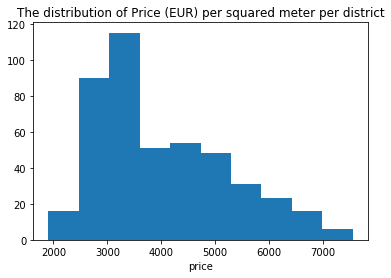

In [49]:
## Look at the price
plt.hist(data = price_copy, x = 'price')
plt.xlabel('price')
plt.title('The distribution of Price (EUR) per squared meter per district')


Most apartment in Helsinki is in the range of 3,000 - 3,500 euro

Text(0, 0.5, '% increase vs 2010')

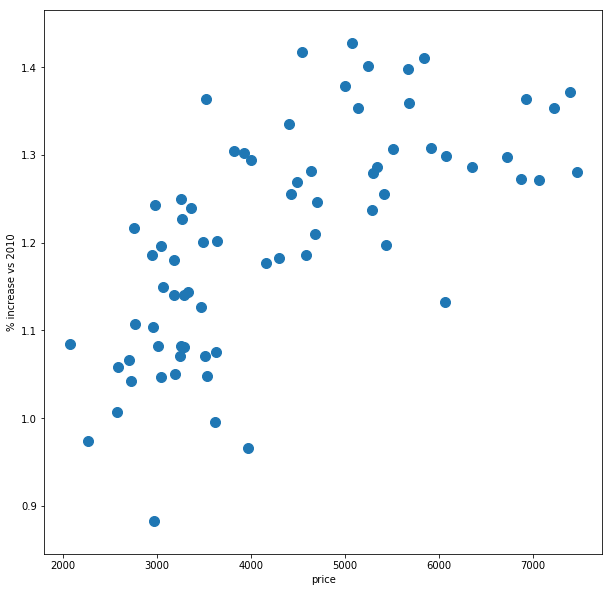

In [62]:
### If we only look at the data in 2017, does district with higher price increase the value more than those with lower value?
plt.figure(figsize = [10,10])
plt.scatter(x = 'price', y = 'increase', s = 100, data = price_copy[price_copy.year == '2017'])
plt.xlabel('price')
plt.ylabel('% increase vs 2010')

Yes, the plot shows that the higher the average price, the faster the property value increases

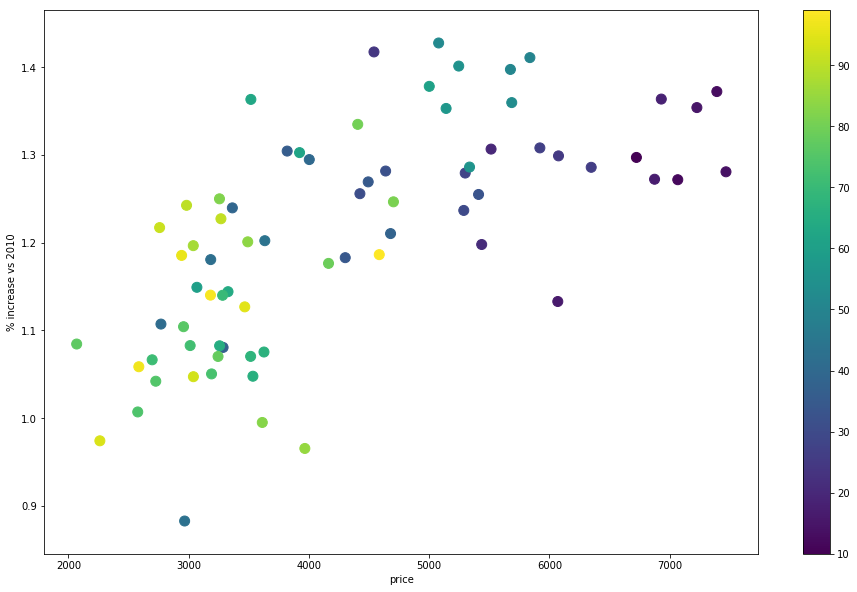

In [60]:
## Does the high-valued district near each other
### If we only look at the data in 2017, does district with higher price increase the value more than those with lower value?
plt.figure(figsize = [16,10])
plt.scatter(x = 'price', y = 'increase', c = 'postal', s = 100,  data = price_copy[price_copy.year == '2017'])
plt.xlabel('price')
plt.ylabel('% increase vs 2010')
plt.colorbar()

It shows that those in nearby areas increase its value at similar rate

My budget is 160,000 euro and I would like to buy 60-squared meter apartment --> The average price per squared meter is 2,700 euro

First, I need to filter the postal area in my reach, i.e., average price per squared meter is 2,800 euro or less

In [53]:
price_filter = price[price['2017'] <= 2800]

### copy "2010" data to make it a base line
price_filter['base_line'] = price_filter['2010']

# melt the data
price_filter_copy = pd.melt(price_filter, id_vars=['postal', 'name', 'base_line'], var_name='year', value_name='price')
price_filter_copy

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,postal,name,base_line,year,price
0,41,Malminkartano,2501.0,2010,2501.0
1,71,Pihlajamaeki,2528.0,2010,2528.0
2,74,Siltamaeki,2558.0,2010,2558.0
3,75,Puistola,2616.0,2010,2616.0
4,77,Jakomaeki,1907.0,2010,1907.0
5,92,Myllypuro,2266.0,2010,2266.0
6,94,Kontula,2321.0,2010,2321.0
7,97,Mellunkylae,2442.0,2010,2442.0
8,41,Malminkartano,2501.0,2013,2731.0
9,71,Pihlajamaeki,2528.0,2013,2535.0


In [54]:
price_filter_copy['increase%'] = price_filter_copy['price']/price_filter_copy['base_line']
price_filter_copy.head()

,postal,name,base_line,year,price,increase%
0,41,Malminkartano,2501.0,2010,2501.0,1.0
1,71,Pihlajamaeki,2528.0,2010,2528.0,1.0
2,74,Siltamaeki,2558.0,2010,2558.0,1.0
3,75,Puistola,2616.0,2010,2616.0,1.0
4,77,Jakomaeki,1907.0,2010,1907.0,1.0


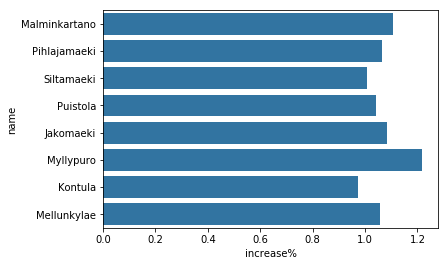

In [69]:
### How does the % increase vs 2010 of different district
base_color = sb.color_palette()[0]
sb.barplot( y = 'name', x = 'increase%', data = price_filter_copy[price_filter_copy.year == '2017'], color = base_color)

Myllypuro has the highest price increase compared to 2010

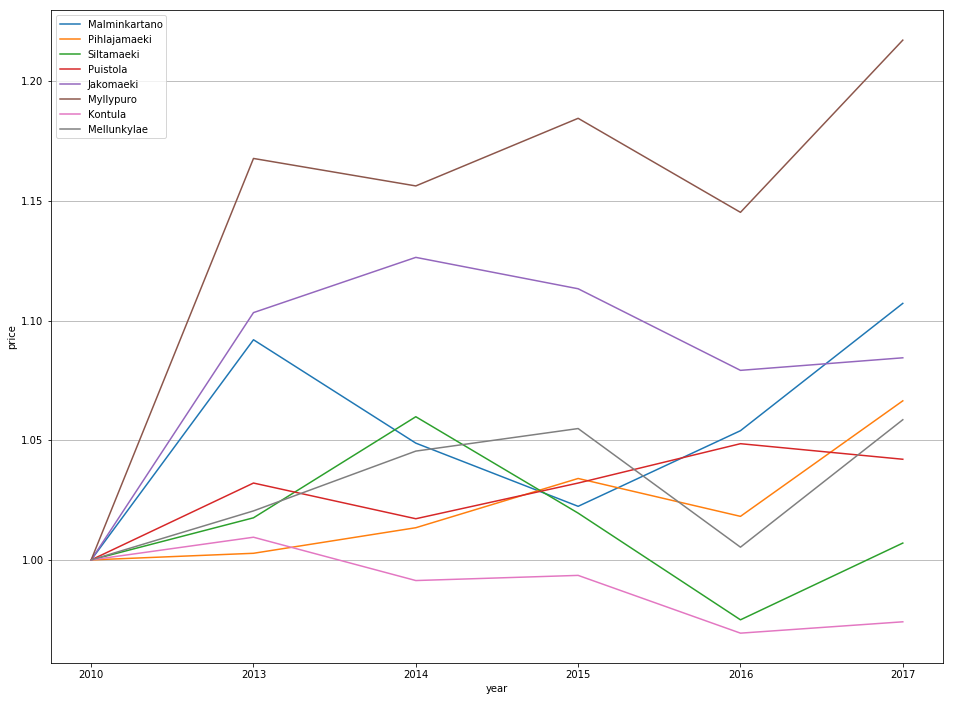

In [55]:
##Visualize the price trend by difference area
district_name = price_filter_copy.name.unique()
plt.figure(figsize = [16,12])
for district in district_name:
    plt.plot('year', 'increase%', data = price_filter_copy[price_filter_copy.name == district])
plt.legend(district_name)
plt.xlabel('year')
plt.ylabel('price')
plt.grid(b = bool, axis = 'y')

The price in Myllypuro was unpwards trend in 2010 - 2013 and remains somewhat stable in 2013 -2016. It increases again in 2016 - 2017 probably due to the new opening of one big university in the area.

Compared to other area, Myllypuro is a good place for my situations for investment